# Data Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Chocolate Sales.csv')

# Exploratory Data Analysis (EDA)

In [ ]:
df.describe()

,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [ ]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [ ]:
df['Amount'] = df['Amount'].str.replace(',','').str.replace('$','').str.strip().astype('int64')

In [ ]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320,180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685,184


## 1. What is the total revenue generated by each salesperson (Kelci Walkden, Brien Boise, and Others)? How do their performances compare?

In [ ]:
df['Sales Person'].value_counts().sort_values(ascending=False)

,count
Sales Person,
Kelci Walkden,54
Brien Boise,53
Van Tuxwell,51
Beverie Moffet,50
Oby Sorrel,49
Dennison Crosswaite,49
Ches Bonnell,48
Gigi Bohling,47
Karlen McCaffrey,47


In [ ]:
df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

,Amount
Sales Person,
Ches Bonnell,320901
Oby Sorrel,316645
Madelene Upcott,316099
Brien Boise,312816
Kelci Walkden,311710
Van Tuxwell,303149
Dennison Crosswaite,291669
Beverie Moffet,278922
Kaine Padly,266490


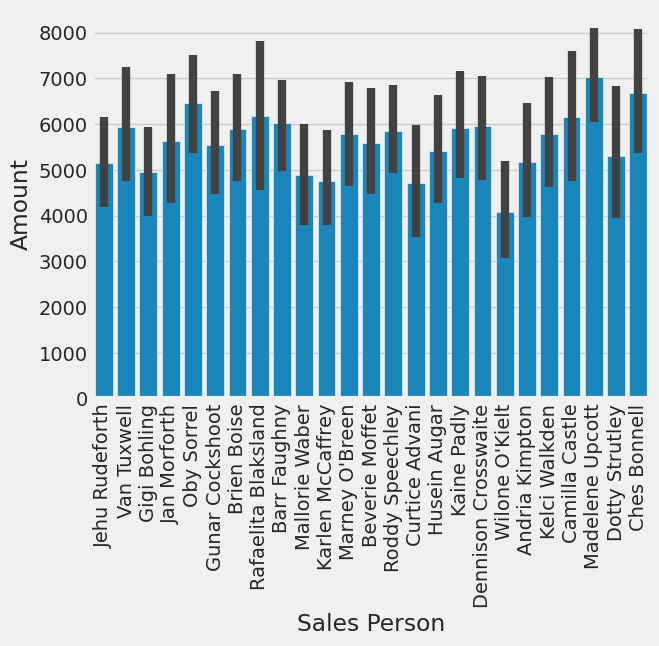

In [ ]:
sns.barplot(x='Sales Person', y='Amount', data=df)
plt.xticks(rotation=90)
plt.show()

## 2. Which country (Australia, India, or Others) contributes the most to the total sales revenue? What percentage of the total revenue does it account for?

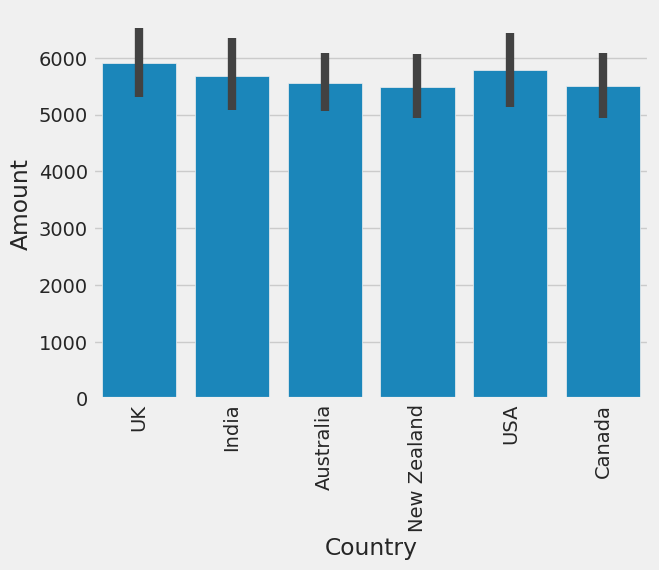

In [ ]:
sns.barplot(x='Country', y='Amount', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
Country_perf = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
Country_perf/df['Amount'].sum()*100

,Amount
Country,
Australia,18.681024
UK,17.217765
USA,16.699588
India,16.127572
Canada,15.779703
New Zealand,15.494349


## 3. How many unique products are sold in the dataset? Which product (e.g., 50% Dark Bites, Eclairs, or Others) has the highest number of transactions?

In [ ]:
df['Product'].nunique()

22

In [ ]:
df['Product'].value_counts().sort_values(ascending=False)

,count
Product,
Eclairs,60
50% Dark Bites,60
Smooth Sliky Salty,59
White Choc,58
Drinking Coco,56
Spicy Special Slims,54
Organic Choco Syrup,52
85% Dark Bars,50
Fruit & Nut Bars,50


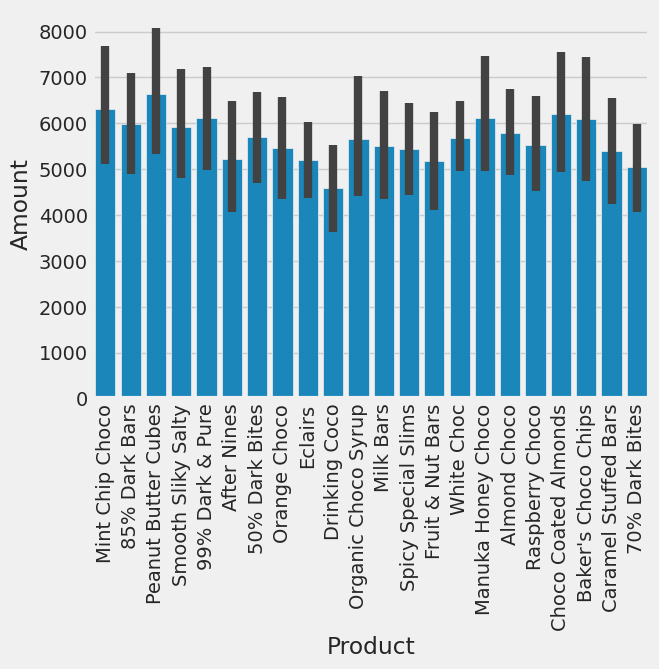

In [ ]:
sns.barplot(x='Product', y='Amount', data=df)
plt.xticks(rotation=90)
plt.show()

## 4. What is the trend of sales over time based on the Date column? Identify the month or period with the highest transaction count.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-16-b9c6864122be>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   int64         
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 51.4+ KB


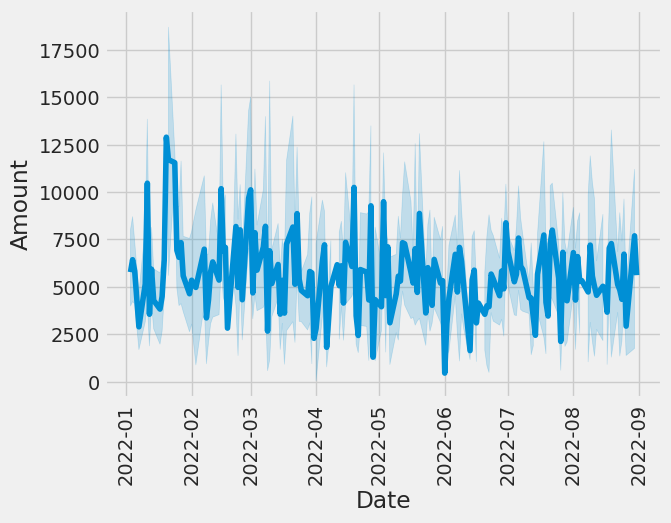

In [ ]:
sns.lineplot(x='Date', y='Amount', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
max_value = df['Amount'].max()
max_date = df.loc[df['Amount'].idxmax(), 'Date']
print(f"Max Sales = {max_value} on {max_date}")

Max Sales = 22050 on 2022-01-27 00:00:00


## 5. What is the distribution of the Amount column? Are there any outliers in the revenue generated per transaction (e.g., values above 638.20 or below 1.00)?

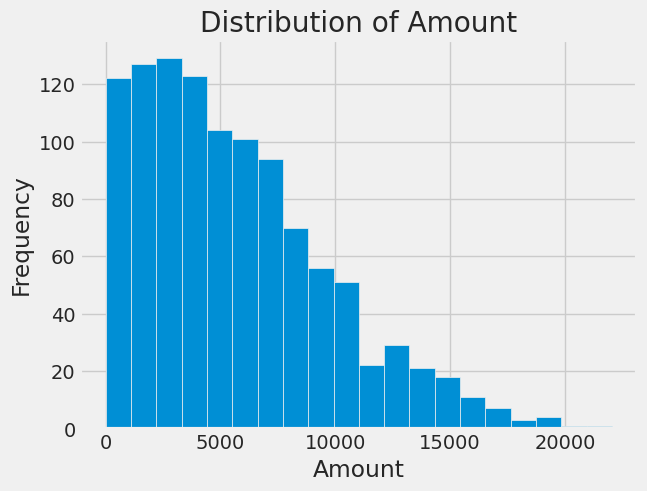

In [ ]:
plt.hist(df['Amount'], bins=20)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Amount')
plt.show()

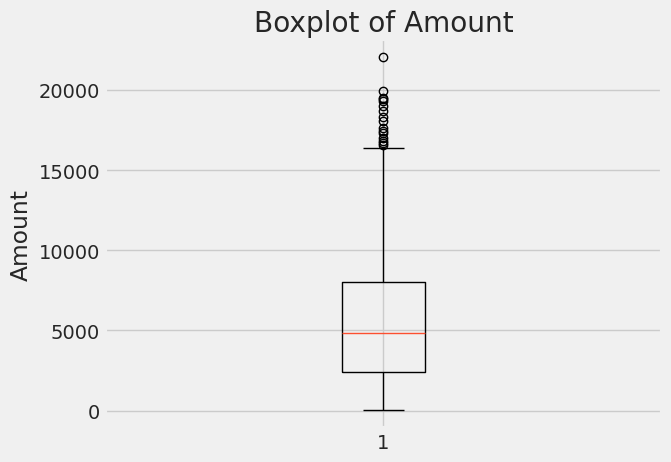

In [ ]:
plt.boxplot(df['Amount'])
plt.ylabel('Amount')
plt.title('Boxplot of Amount')
plt.show()

In [ ]:
df.describe()

,Date,Amount,Boxes Shipped
count,1094,1094.000000,1094.000000
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-03-02 00:00:00,2390.500000,70.000000
50%,2022-05-11 00:00:00,4868.500000,135.000000
75%,2022-07-04 00:00:00,8027.250000,228.750000
max,2022-08-31 00:00:00,22050.000000,709.000000
std,NaN,4102.442014,121.544145


In [ ]:
df[df['Date']== "2022-01-27"]

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
77,Marney O'Breen,USA,Orange Choco,2022-01-27,7595,181
188,Husein Augar,New Zealand,Caramel Stuffed Bars,2022-01-27,497,475
278,Karlen McCaffrey,USA,Milk Bars,2022-01-27,4389,7
543,Ches Bonnell,India,Peanut Butter Cubes,2022-01-27,22050,208
820,Kelci Walkden,USA,Almond Choco,2022-01-27,5180,233
853,Dennison Crosswaite,India,Organic Choco Syrup,2022-01-27,8428,216
959,Brien Boise,UK,Drinking Coco,2022-01-27,5754,133
987,Curtice Advani,New Zealand,50% Dark Bites,2022-01-27,9765,85
1010,Kaine Padly,UK,Drinking Coco,2022-01-27,2317,224


In [ ]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

In [ ]:
max_value = df['Amount'].max()
max_date = df.loc[df['Amount'].idxmax(), 'Date']
print(f"Max Sales = {max_value} on {max_date}")

Max Sales = 16401 on 2022-03-21 00:00:00


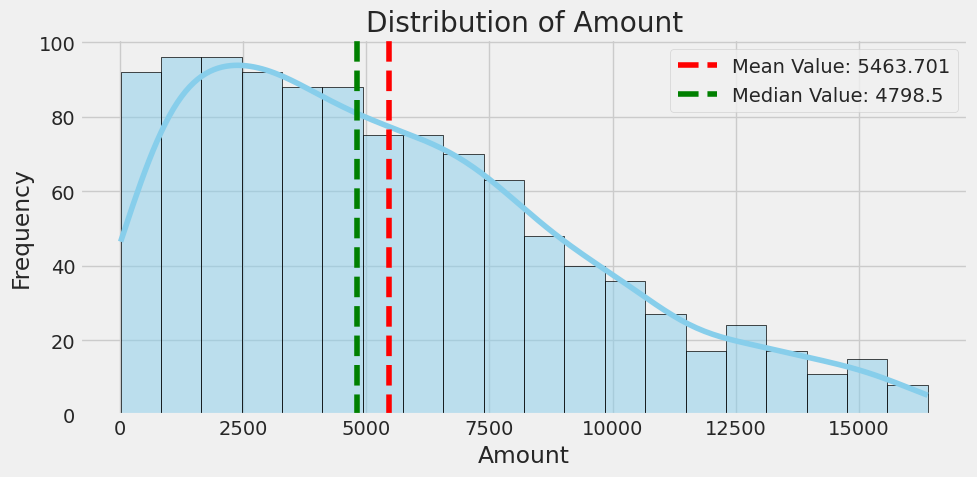

In [ ]:
mean_value = round(df['Amount'].mean(),3)
median_value = round(df['Amount'].median(),3)
figure = plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Amount')
plt.axvline(x=mean_value, color='red', linestyle='--',label=f"Mean Value: {mean_value}")
plt.axvline(x=median_value, color='green', linestyle='--',label=f"Median Value: {median_value}")
plt.legend()
plt.tight_layout()
plt.show()

## 6. How does the number of Boxes Shipped correlate with the Amount? Is there a strong relationship between these two variables?

In [ ]:
df.corr(numeric_only=True)

,Amount,Boxes Shipped
Amount,1.000000,-0.019615
Boxes Shipped,-0.019615,1.000000


## 7. Which salesperson shipped the most boxes of chocolate? Does this align with their total revenue contribution?

In [ ]:
df_salesp = df.groupby('Sales Person')['Boxes Shipped'].sum().sort_values(ascending=False)
print(f"{df_salesp.index[0]}: {df_salesp.iloc[0]}")

Karlen McCaffrey: 9658


# Data Cleaning

## 8. Are there any missing values in the dataset (e.g., in Sales Person, Country, Product, Date, Amount, or Boxes Shipped)? How would you handle them?

In [ ]:
df['Date'].unique()

<DatetimeArray>
['2022-01-04 00:00:00', '2022-08-01 00:00:00', '2022-07-07 00:00:00',
 '2022-04-27 00:00:00', '2022-02-24 00:00:00', '2022-06-06 00:00:00',
 '2022-01-25 00:00:00', '2022-03-24 00:00:00', '2022-04-20 00:00:00',
 '2022-07-04 00:00:00',
 ...
 '2022-04-18 00:00:00', '2022-03-30 00:00:00', '2022-08-16 00:00:00',
 '2022-06-03 00:00:00', '2022-03-01 00:00:00', '2022-02-18 00:00:00',
 '2022-07-20 00:00:00', '2022-04-28 00:00:00', '2022-07-14 00:00:00',
 '2022-01-20 00:00:00']
Length: 168, dtype: datetime64[ns]

In [ ]:
df.describe()

,Date,Amount,Boxes Shipped
count,1078,1078.000000,1078.000000
mean,2022-05-03 14:25:36.178107392,5463.701299,161.800557
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-03-02 00:00:00,2346.750000,69.250000
50%,2022-05-11 00:00:00,4798.500000,135.000000
75%,2022-07-04 00:00:00,7892.500000,229.000000
max,2022-08-31 00:00:00,16401.000000,709.000000
std,NaN,3822.964349,121.843013


In [ ]:
df['Country'].unique()

array(['UK', 'India', 'Australia', 'New Zealand', 'USA', 'Canada'],
      dtype=object)

In [ ]:
df['Product'].unique()

array(['Mint Chip Choco', '85% Dark Bars', 'Peanut Butter Cubes',
       'Smooth Sliky Salty', '99% Dark & Pure', 'After Nines',
       '50% Dark Bites', 'Orange Choco', 'Eclairs', 'Drinking Coco',
       'Organic Choco Syrup', 'Milk Bars', 'Spicy Special Slims',
       'Fruit & Nut Bars', 'White Choc', 'Manuka Honey Choco',
       'Almond Choco', 'Raspberry Choco', 'Choco Coated Almonds',
       "Baker's Choco Chips", 'Caramel Stuffed Bars', '70% Dark Bites'],
      dtype=object)

In [ ]:
df.duplicated().count()

np.int64(1078)

### The dataset is clean. There are no null values, no wrong datatypes, no data inconsistencies and no duplicates

# Business Insights

## 13. Based on the dataset, which salesperson should the chocolate company recognize as the top performer? Justify your answer using revenue and boxes shipped.

In [ ]:
df_salesp = df.groupby('Sales Person')[['Boxes Shipped', 'Amount']].sum().sort_values(by='Amount', ascending=False)
print(f"{df_salesp.index[0]}\n Boxes Shipped: {df_salesp.iloc[0,0]}\n Amount: {df_salesp.iloc[0,1]}")

Oby Sorrel
 Boxes Shipped: 8608
 Amount: 316645


## 14. Which country should the company focus on for expanding its chocolate sales? Support your recommendation with data.

### As shown earlier Australia is the top market and least performing market is New Zealand. The chocolate business should be exapnded there to increase revenues.

## 15. What insights can you provide about the popularity of chocolate products (e.g., 50% Dark Bites vs. Eclairs)? How can the company use this to adjust its production or marketing strategy?

In [ ]:
df_product = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)
df_product.index[0]
df_product

,Amount
Product,
50% Dark Bites,341712
White Choc,329147
Smooth Sliky Salty,311374
Peanut Butter Cubes,302792
Spicy Special Slims,293454
Eclairs,292964
99% Dark & Pure,283003
85% Dark Bars,281197
Almond Choco,277536


### The top selling product as shown in EDA was Eclairs. However, the most revenue was generated by 50% Dark Bites. The company should focus on increasing the sales of revenue generating products including 50% Dark Bites. While a little price increase of the products already selling good can increase overall revenues.

## 16. Are there seasonal patterns in chocolate sales (e.g., higher sales in certain months)? How can the business use this information for inventory planning?

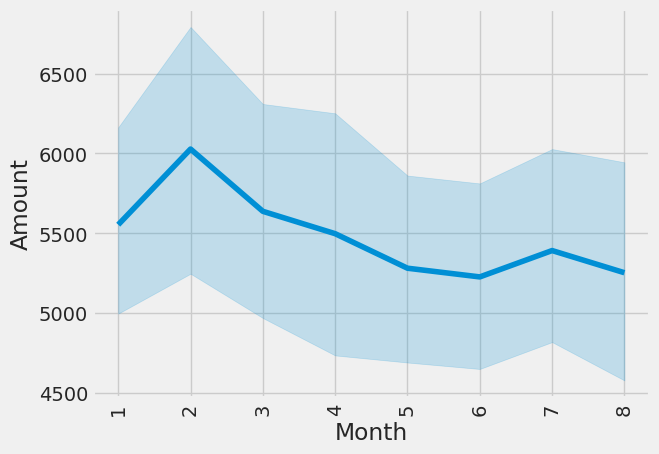

In [ ]:
sns.lineplot(x='Month', y='Amount', data=df)
plt.xticks(rotation=90)
plt.show()

### The company's sales decline in months 6,7,8 and increase in 1,2. It can stock products in sale declining months and use the inventory in 1,2 months while normalizing the production rate throughout the year. The operational cost will then remain nominal throughout the year.

# Machine Learning

## 18. Suppose you want to predict whether a transaction will generate "High" revenue (e.g., Amount > 355.00) or "Low" revenue (e.g., Amount ≤ 355.00). How would you preprocess the dataset (e.g., encoding categorical variables like Sales Person, Country, Product) for use in KNN, Decision Tree, Logistic Regression, and Random Forest models?

In [ ]:
df['Transaction_type'] = pd.cut(df['Amount'], bins=[0, 5000, 17000],labels=['Low', 'High'])

In [ ]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Transaction_type
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180,High
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94,High
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501,91,Low
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726,342,High
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685,184,High


In [ ]:
df['Transaction_type'].value_counts()

,count
Transaction_type,
Low,558
High,520


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%b-%y")
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.dayofweek
df.drop(['Date'], axis=1, inplace=True)

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Country', 'Product', 'Sales Person'],drop_first=True)
df_encoded.head()

,Amount,Boxes Shipped,Transaction_type,Month,Year,DayOfWeek,Country_Canada,Country_India,Country_New Zealand,Country_UK,...,Sales Person_Karlen McCaffrey,Sales Person_Kelci Walkden,Sales Person_Madelene Upcott,Sales Person_Mallorie Waber,Sales Person_Marney O'Breen,Sales Person_Oby Sorrel,Sales Person_Rafaelita Blaksland,Sales Person_Roddy Speechley,Sales Person_Van Tuxwell,Sales Person_Wilone O'Kielt
0,5320,180,High,1,2022,1,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,7896,94,High,8,2022,0,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,4501,91,Low,7,2022,3,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,12726,342,High,4,2022,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13685,184,High,2,2022,3,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_encoded.shape

(1078, 56)

## 19. Train a KNN classifier to predict whether a transaction is "High" or "Low" revenue based on features like Boxes Shipped, Country, and Product. What value of K would you choose, and why?

In [ ]:
X = df_encoded.drop('Transaction_type', axis=1)
y = df_encoded['Transaction_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.99      1.00      0.99        93
         Low       1.00      0.99      1.00       123

    accuracy                           1.00       216
   macro avg       0.99      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.99      1.00      0.99        93
         Low       1.00      0.99      1.00       123

    accuracy                           1.00       216
   macro avg       0.99      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



In [ ]:
knn_acc = accuracy_score(y_test, y_pred)

### There is no change in accuracy score when n= 7 was selected. Therefore, we will go with n=5

## 20. Build a Decision Tree Classifier to predict the same "High" vs. "Low" revenue outcome. Which feature (e.g., Boxes Shipped, Country, Sales Person) is the most important in splitting the data? How do you interpret this?

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        93
         Low       1.00      1.00      1.00       123

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



In [ ]:
dt_acc = accuracy_score(y_test, y_pred)

## 22. Implement a Random Forest Classifier to predict "High" vs. "Low" revenue. How does the ensemble approach improve performance compared to a single Decision Tree? What is the importance of each feature (e.g., Boxes Shipped, Country) in the Random Forest model?

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        93
         Low       1.00      1.00      1.00       123

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



In [ ]:
rf_acc = accuracy_score(y_test, y_pred)

## 23. Compare the performance of KNN, Decision Tree, Logistic Regression, and Random Forest models using accuracy, precision, and recall. Which model performs best for this classification task, and why?

In [ ]:
table = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree', 'Random Forest'],
    'Accuracy': [knn_acc, dt_acc, rf_acc],
    })
print(table)

           Model  Accuracy
0            KNN   0.99537
1  Decision Tree   0.99537
2  Random Forest   0.99537


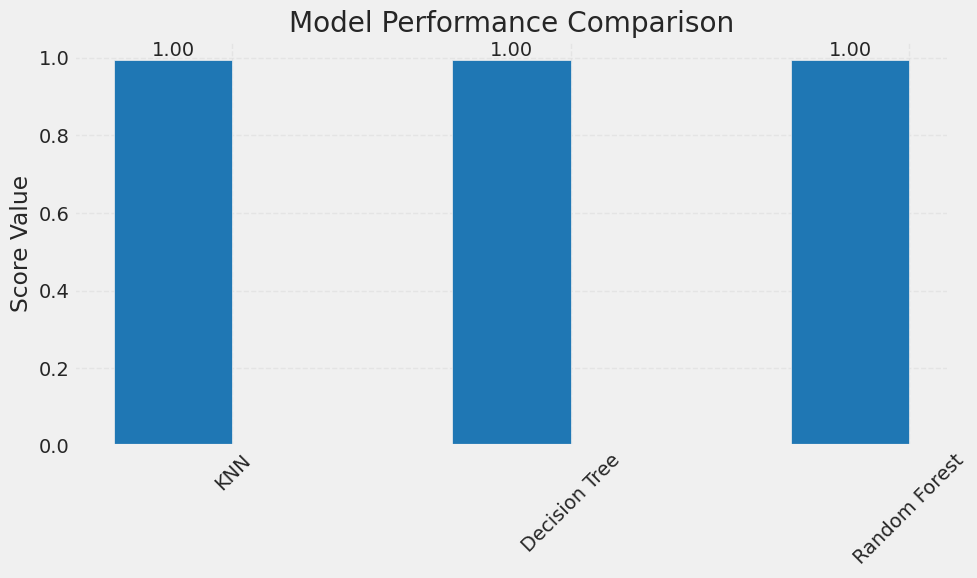

In [ ]:
plt.figure(figsize=(10, 6))
width = 0.35
x = np.arange(len(table['Model']))
acc_bars = plt.bar(x - width/2, table['Accuracy'], width, label='Accuracy Scores', color='#1f77b4')
plt.title('Model Performance Comparison')
plt.ylabel('Score Value')
plt.xticks(x, table['Model'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
for bar in acc_bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height,
        f'{height:.2f}',
        ha='center', va='bottom'
    )
plt.tight_layout()
plt.show()

## 24. Tune the Random Forest model by adjusting hyperparameters (e.g., number of trees, maximum depth). How do these changes affect the model’s performance?
## 25. Can you use the dataset to cluster sales transactions into groups (e.g., using K-Means) instead of classification? What features would you use, and how might the clusters help the business?

### The model is already very very accurate

In [ ]:
y_test.value_counts()

,count
Transaction_type,
Low,123
High,93


In [ ]:
null_accuracy = (123/(123+93))
print(f"Null Accuracy: {null_accuracy}")

Null Accuracy: 0.5694444444444444
